## Connecting to DataBase

In [6]:
import pandas as pd
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="Litopia")
mycursor = db.cursor()

#  Important feature for laptop

In [3]:
sql_query = f"""
SELECT Category_ID       AS Category,
       Manufacturer_ID   AS Manufacturer,
       CPU_ID            AS CPU,
       GPU_ID            AS GPU,
       RAM               AS RAM,
       Weight            AS Weight,
       OS_ID             AS OS,
       HDD_Storage       AS HDD,
       SSD_Storage       AS SSD,
       count(Product_ID) AS SellCount
FROM orders
         JOIN product
              ON orders.Product_ID = product.ID
GROUP BY Product_ID;
"""

mycursor.execute(sql_query)
results = mycursor.fetchall()
df = pd.DataFrame(results, columns=['Category', 'Manufacturer', 'CPU', 'GPU', 'RAM', 'Weight', 'OS', 'HDD', 'SSD', 'SellCount'])

In [10]:
df.describe()

,Category,Manufacturer,CPU,GPU,RAM,OS,HDD,SSD,SellCount
count,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000
mean,2.469225,10.335731,51.701839,74.727418,8.446043,3.131095,420.296563,191.109512,813.014388
std,1.910302,5.616618,36.131114,30.831543,5.118368,0.743236,515.353796,185.601470,565.544709
min,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,76.000000
25%,1.000000,8.000000,13.000000,47.500000,4.000000,3.000000,0.000000,0.000000,315.000000
50%,1.000000,9.000000,59.000000,87.000000,8.000000,3.000000,0.000000,256.000000,802.000000
75%,4.000000,17.000000,88.000000,95.000000,8.000000,3.000000,1000.000000,256.000000,1175.500000
max,6.000000,19.000000,118.000000,110.000000,64.000000,6.000000,2000.000000,1024.000000,4292.000000


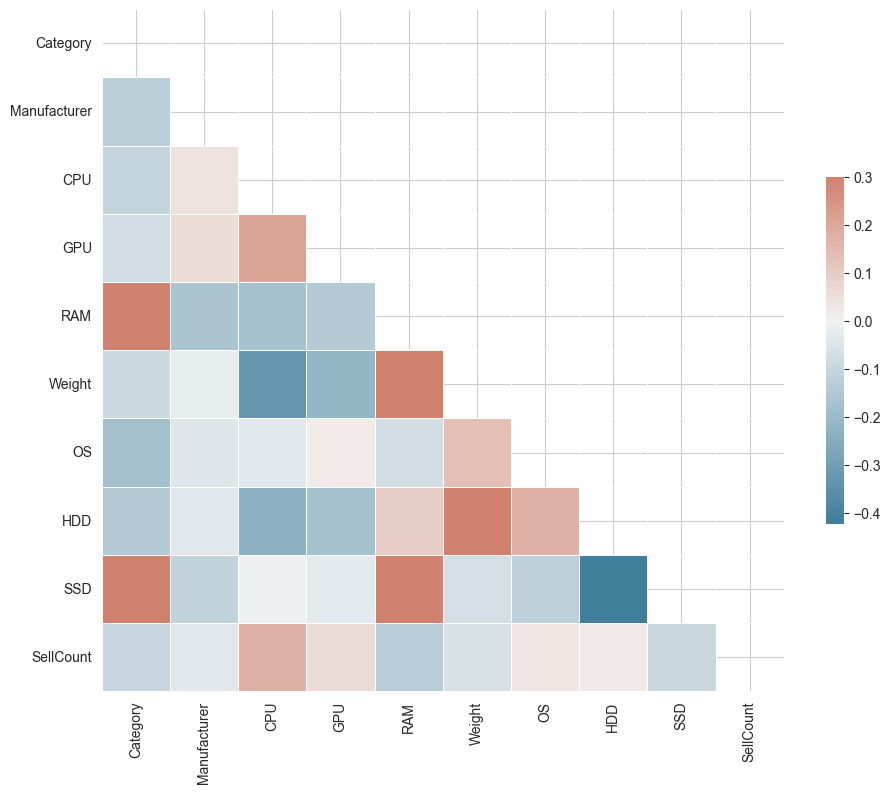

In [11]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

C:\Users\raeim\Data Analysis\dataVenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\raeim\Data Analysis\dataVenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\raeim\Data Analysis\dataVenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


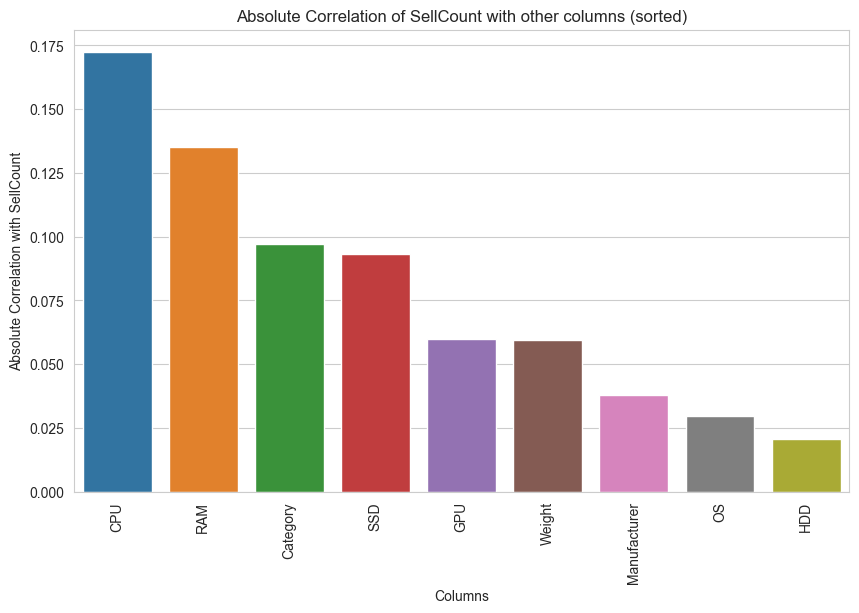

In [13]:
# Compute the correlation matrix
corr = df.corr()

# Select only 'SellCount' column from the correlation matrix
sellcount_corr = corr['SellCount']

# Remove 'SellCount' from the series
sellcount_corr = sellcount_corr[sellcount_corr.index != 'SellCount']

# Take the absolute value of the correlations and sort them in descending order
sellcount_corr = sellcount_corr.abs().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sellcount_corr.index, y=sellcount_corr.values)

# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Absolute Correlation with SellCount')
plt.title('Absolute Correlation of SellCount with other columns (sorted)')
plt.xticks(rotation=90)

plt.show()
